In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

import os
import subprocess

import webbrowser

from mpl_toolkits.basemap import Basemap
from PIL import Image

In [2]:
start_dir  = os.getcwd()
data_dir   = pathlib.Path(os.getcwd()).parts[:-1] + ('IEData', )
python_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('Python', )
figure_dir = pathlib.Path(os.getcwd()).parts[:-1] + ('SavedFigures', ) 

os.chdir(pathlib.Path(*python_dir))
import PyInstEvo

os.chdir(pathlib.Path(*data_dir))
NDData = pd.read_pickle('NaDeneDraws.pkl')

In [3]:
os.chdir(pathlib.Path(*figure_dir))

In [4]:
for i in range(100):
    NDData[i].showtree()
    Fig = 'NDFig'+str(i)+'.png'
    plt.savefig(Fig, bbox_inches = 'tight')
    plt.close() 

For this block of code, we need to have `ffmpeg.exe` in the right place. I don't know what the hell this code does, but it does write our data to a movie (`.mp4`).

In [5]:
#os.system('ffmpeg -y -framerate 1/0.25 -i NDFig%d.png -c:v libx264 -r 30 NaDeneSimNew.mp4')
os.system('ffmpeg -f image2 -r 1/5 -i NDFig%d.png -vcodec mpeg4 -y NaDeneSimNew.mp4')

0

Perhaps one way to deal with this is to write an html wrapper for the above movie, and then (somehow) open it - either inline or somewhere else. It appears to work best with Microsoft Edge Browser...

In [6]:
%%writefile NaDeneMovie.html
<html>
    <head>
    <title> MCMC Sampling of the Na-Dene language Group </title>
    </head>
    <body>
    <video width="800" height="800" controls="controls">
      <source src="NaDeneSimNew.mp4" type="video/mp4" />
    </video>   
    </body>
</html>

Overwriting NaDeneMovie.html


This file can be opened up and the movie can be seen in any browser. It shows how the linguistic tree is converging over time to something interesting. Let's now try to go a little further, and simulate the progress of the point data as things go. This will simply require using our `latlonplot()` class method.

In [7]:
pathToVid = "file:///"+os.getcwd().replace('\\','/')+'/NaDeneMovie.html'

In [8]:
new = 2
webbrowser.open(pathToVid, new=new)

True

# Plotting location and tree side by side (I hope!)

In [9]:
NaDeneEx = NDData[99]

NaDeneEx.RouteChooser()
NaDeneEx.TimeInPlace()

C:\Users\mjbaker\documents\github\instevo\Python\PyInstEvo.py:1440: RuntimeWarning: divide by zero encountered in log
  lnD       = - np.log(D)
C:\Users\mjbaker\documents\github\instevo\Python\PyInstEvo.py:1605: RuntimeWarning: divide by zero encountered in log
  toGet = np.matrix(-np.log(D))[origin,:][:,colns].T
C:\Users\mjbaker\documents\github\instevo\Python\PyInstEvo.py:664: RuntimeWarning: invalid value encountered in true_divide
  Probs = np.exp(lnProbs2u)/np.sum(np.exp(lnProbs2u))
C:\Users\mjbaker\documents\github\instevo\Python\PyInstEvo.py:668: RuntimeWarning: invalid value encountered in less
  return np.max(np.where(rs < pick)[0])


In [10]:
# Let's pull this code out for now and see if we can get it on a basemap. 

def basemapplot(Obj, Cmap = 'Reds'):
    y = np.asarray(Obj.lat.astype(float)).flatten().tolist()
    x = np.asarray(Obj.lon.astype(float)).flatten().tolist()
        
    Order=np.asarray(Obj.resolvedtree[:,-1]).astype(int).flatten()

    # It might be better to reorder this elsewhere!
        
    y = [y[i] for i in Order]
    x = [x[i] for i in Order]
        
    name = np.asarray(Obj.name).flatten().tolist()

    s = [3000*n for n in Obj.timeinplace]

    myfig = plt.figure()
    mypic = myfig.add_subplot(111)
    mypic.scatter(x, y, c=s, s=s, cmap=Cmap)

def basemapplot(Obj, Cmap = 'Reds'):
    y = np.asarray(Obj.lat.astype(float)).flatten().tolist()
    x = np.asarray(Obj.lon.astype(float)).flatten().tolist()
        
    Order=np.asarray(Obj.resolvedtree[:,-1]).astype(int).flatten()

    # It might be better to reorder this elsewhere!
        
    y = [y[i] for i in Order]
    x = [x[i] for i in Order]
        
    name = np.asarray(Obj.name).flatten().tolist()

    s = [3000*n for n in Obj.timeinplace]

    myfig = plt.figure(figsize=(8,8))

    h=3000

    m = Basemap(projection='nsper',lon_0=-105,lat_0=50,
            satellite_height=h*1000.,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color='lightgray', zorder=0)

    m.drawparallels(np.arange(-90.,120.,30.))
    m.drawmeridians(np.arange(0.,420.,60.))

    m.scatter(x, y, s=s, c=s, cmap='Reds', latlon=True)
    xpt,ypt = m(x,y)
    for i, txt in enumerate(name):
        plt.annotate(name[i], (xpt[i], ypt[i]), size = 7)
    
    myfig.show()
    
    myfig.show()

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


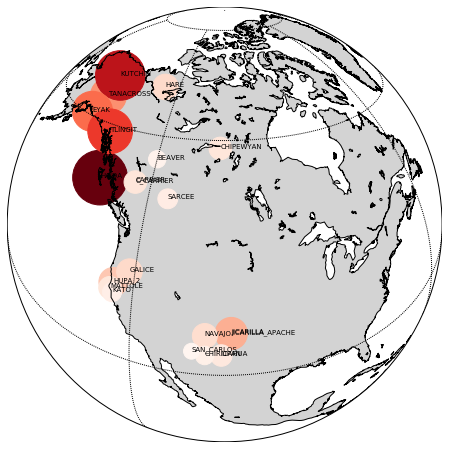

In [11]:
basemapplot(NaDeneEx)

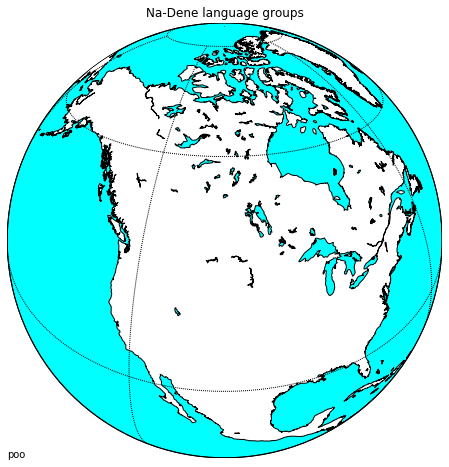

In [12]:
fig = plt.figure(figsize=(8,8))

h=3000

m = Basemap(projection='nsper',lon_0=-105,lat_0=50,
        satellite_height=h*1000.,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Na-Dene language groups")
plt.annotate('poo',(10,10))
plt.show()

In [13]:
def basemapplot(Obj, Cmap = 'Reds'):
    y = np.asarray(Obj.lat.astype(float)).flatten().tolist()
    x = np.asarray(Obj.lon.astype(float)).flatten().tolist()
        
    Order=np.asarray(Obj.resolvedtree[:,-1]).astype(int).flatten()

    # It might be better to reorder this elsewhere!
        
    y = [y[i] for i in Order]
    x = [x[i] for i in Order]
        
    name = np.asarray(Obj.name).flatten().tolist()

    s = [3000*n for n in Obj.timeinplace]

    myfig = plt.figure(figsize=(8,8))

    h=3000

    m = Basemap(projection='nsper',lon_0=-105,lat_0=50,
            satellite_height=h*1000.,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color='lightgray', zorder=0)

    m.drawparallels(np.arange(-90.,120.,30.))
    m.drawmeridians(np.arange(0.,420.,60.))

    m.scatter(x, y, s=s, c=s, cmap='Reds', latlon=True)
    xpt,ypt = m(x,y)
    for i, txt in enumerate(name):
        plt.annotate(name[i], (xpt[i], ypt[i]), size = 7)
    
    myfig.show()

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Done


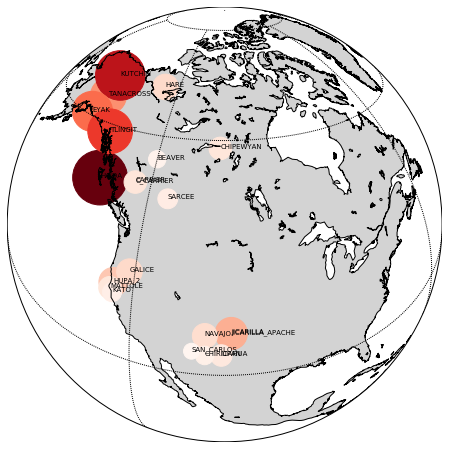

In [14]:
basemapplot(NaDeneEx)
figToSave=plt.gcf()
plt.savefig('test.png', bbox_inches = 'tight')
print('Done')

In [17]:
im1 = Image.open('NDFig0.png')
im2 = Image.open('test.png').resize(im1.size)

We can now make a blank image and paste our two images side by side on it:

In [18]:
blank_image = Image.new("RGB", (im1.size[0]*2,im1.size[1]))
blank_image.paste(im1,(0,0))
blank_image.paste(im2,(im1.size[0],0))
blank_image.show()

In [19]:
for i in range(100):
    NDData[i].RouteChooser()
    NDData[i].TimeInPlace()    
    basemapplot(NDData[i])
    Fig = 'BMFig'+str(i)+'.png'
    plt.savefig(Fig, bbox_inches = 'tight')
    plt.close() 

C:\Users\mjbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Now, run a routine that puts the two side-by-side in a sequence of figures...

In [20]:
for i in range(100):
    image1name = 'NDFig'+str(i)+'.png'
    image2name = 'BMFig'+str(i)+'.png'
    im1        = Image.open(image1name)
    im2        = Image.open(image2name).resize(im1.size)
    blank_image = Image.new("RGB", (im1.size[0]*2, im1.size[1]))
    blank_image.paste(im1, (0,0))
    blank_image.paste(im2, (im1.size[0], 0))
    cfname = 'CFFig'+str(i)+'.png'
    blank_image.save(cfname)

In [23]:
#os.system('ffmpeg -y -framerate 1/0.25 -i CFFig%d.png -c:v libx264 -r 30 CombNaDeneSim.mp4')
os.system('ffmpeg -f image2 -r 1/5 -i CFFig%d.png -vcodec mpeg4 -y CombNaDeneSim.mp4')

0

In [24]:
%%writefile CombNaDeneMovie.html
<html>
    <head>
    <title> MCMC Sampling of the Na-Dene language Tree with Locations </title>
    </head>
    <body>
    <video width="1200" height="800" controls="controls">
      <source src="CombNaDeneSim.mp4" type="video/mp4" />
    </video>   
    </body>
</html>

Writing CombNaDeneMovie.html


In [25]:
pathToVid = "file:///"+os.getcwd().replace('\\','/')+'/CombNaDeneMovie.html'
new = 2
webbrowser.open(pathToVid, new=new)

True